In [1]:
library(qvalue)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [1]:
### All cells

In [2]:
myfolder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/scCellOutput_PCA20_88_rep/"

In [3]:
myfile = paste0(myfolder, "top_qtl_results_all.txt")
df = read.csv(myfile, sep = "\t")
head(df)

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id
2_85136614_A_C,0.0053857477,-0.11092610,0.039858348,0.032141208,2,85132749,85133795,7552,89,270.8121456,202.80752,2,85136614,C,1,0.1011236,0.591201674,ENSG00000034510
2_85561843_C_G,0.0017030083,0.07972131,0.025407868,0.005634175,2,85569211,85581743,7552,89,1.6134664,17.48952,2,85561843,G,1,0.3314607,0.337525961,ENSG00000042445
2_85668379_T_C,0.0046196880,0.10355530,0.036560694,0.186839814,2,85621871,85645555,7552,89,0.3065642,856.29493,2,85668379,C,1,0.2808989,0.603686292,ENSG00000042493
2_80465130_G_A,0.0013468304,-0.15294647,0.047709156,0.038179327,2,79412357,80875905,7552,89,184.1751223,37.78579,2,80465130,A,1,0.1179775,1.000000000,ENSG00000066032
2_79253028_G_T,0.0054167348,-0.01224387,0.004402454,0.773022072,2,79347488,79350545,7552,89,4.2448912,30.67413,2,79253028,T,1,0.1910112,0.512268150,ENSG00000115386
2_85082545_A_T,0.0008935882,0.07390391,0.022246482,0.301572353,2,84743579,85046713,7552,89,77.9985978,44.47150,2,85082545,T,1,0.1629213,0.009723937,ENSG00000115423


In [4]:
length(unique(df$feature_id))

[1] 2766

In [5]:
df0 <- df[-which(duplicated(df$feature_id)),]
df0$q_value = qvalue(df0$empirical_feature_p_value)$qvalues
length(unique(df0$feature_id))
length(unique(df0[df0$q_value < 0.05,"feature_id"]))
length(unique(df0[df0$q_value < 0.05,"feature_id"]))/length(unique(df0$feature_id))

[1] 2766

[1] 1668

[1] 0.6030369

In [6]:
#### 5 cells only

In [49]:
myfolder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/scCellOutput_PCA20_88_5cell

In [50]:
myfile = paste0(myfolder, "top_qtl_results_all.txt")
df = read.csv(myfile, sep = "\t")
head(df)

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id
2_85133924_G_C,0.0912044498,-0.07734318,0.04579017,0.25497204,2,85132749,85133795,444,89,0.5727684,54.80178,2,85133924,C,1,0.1123596,1.0000000,ENSG00000034510
2_85640673_A_T,0.0464921604,0.25643040,0.12880141,0.76962139,2,85569211,85581743,444,89,29.9219463,104.53296,2,85640673,T,1,0.1011236,1.0000000,ENSG00000042445
2_85599121_G_A,0.0117916440,0.18658563,0.07409134,0.19311765,2,85621871,85645555,444,89,0.4324621,21.09467,2,85599121,A,1,0.2471910,0.7763645,ENSG00000042493
2_79726421_C_A,0.0006466478,0.28817060,0.08447644,0.01211514,2,79412357,80875905,444,89,55.6550857,55.14593,2,79726421,A,1,0.4831461,0.8334347,ENSG00000066032
2_79342547_C_T,0.0045082113,0.11811351,0.04158601,0.90318255,2,79347488,79350545,444,89,0.6771352,56.07553,2,79342547,T,1,0.1460674,0.3848668,ENSG00000115386
2_85065950_G_A,0.1002136413,0.10184050,0.06195361,0.71567637,2,84743579,85046713,444,89,10.8428835,13.41637,2,85065950,A,1,0.1235955,1.0000000,ENSG00000115423


In [51]:
length(unique(df$feature_id))

[1] 2718

In [29]:
df1 <- df[-which(duplicated(df$feature_id)),]
df1$q_value = qvalue(df1$empirical_feature_p_value)$qvalues
length(unique(df1$feature_id))
length(unique(df1[df1$q_value < 0.05,"feature_id"]))
length(unique(df1[df1$q_value < 0.05,"feature_id"]))/length(unique(df1$feature_id))

[1] 2706

[1] 840

[1] 0.3104213

In [10]:
bulk_matched_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/Bulk/BulkDay0Healthy_PCA20_88_206/"
res = read.csv(paste0(bulk_matched_folder,"qtl_results_all.txt"), sep = "\t")
nrow(res)

[1] 16691457

In [11]:
bulk_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/Bulk/BulkTotal_PCA20/"
res_all = read.csv(paste0(bulk_folder,"qtl_results_all.txt"), sep = "\t")
nrow(res_all)

[1] 18974762

In [30]:
## all cells
df2 = df0[df0$q_value < 0.05,]

In [31]:
df3 = inner_join(df2, res, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df3 <- df3[-which(duplicated(df3$feature_id)),]
nrow(df3)

c(nrow(df3[(df3$p_value.bulk < 0.05 & 
         (df3$beta.sc*df3$beta.bulk)>0),]),
  nrow(df3[(df3$p_value.bulk < 0.05 & 
         (df3$beta.sc*df3$beta.bulk)>0),])/nrow(df3))
  
  
c(nrow(df3[(df3$p_value.bulk < 0.05),]),
    nrow(df3[(df3$p_value.bulk < 0.05),])/nrow(df3))

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 1153

[1] 153.0000000   0.1326973

[1] 186.0000000   0.1613183

In [33]:
df4 = inner_join(df2, res_all, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df4 <- df4[-which(duplicated(df4$feature_id)),]
nrow(df4)

c(nrow(df4[(df4$p_value.bulk < 0.05 & 
         (df4$beta.sc*df4$beta.bulk)>0),]),
  nrow(df4[(df4$p_value.bulk < 0.05 & 
         (df4$beta.sc*df4$beta.bulk)>0),])/nrow(df4))
  
  
c(nrow(df4[(df4$p_value.bulk < 0.05),]),
    nrow(df4[(df4$p_value.bulk < 0.05),])/nrow(df4))

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 1466

[1] 227.0000000   0.1548431

[1] 276.0000000   0.1882674

In [52]:
## 5 cells per donor
df2 = df1[df1$q_value < 0.05,]

In [53]:
df3 = inner_join(df2, res, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df3 <- df3[-which(duplicated(df3$feature_id)),]
nrow(df3)

c(nrow(df3[(df3$p_value.bulk < 0.05 & 
         (df3$beta.sc*df3$beta.bulk)>0),]),
  nrow(df3[(df3$p_value.bulk < 0.05 & 
         (df3$beta.sc*df3$beta.bulk)>0),])/nrow(df3))
  
  
c(nrow(df3[(df3$p_value.bulk < 0.05),]),
    nrow(df3[(df3$p_value.bulk < 0.05),])/nrow(df3))

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 665

[1] 65.00000000  0.09774436

[1] 81.0000000  0.1218045

In [54]:
head(df3)

,snp_id,p_value.sc,beta.sc,beta_se.sc,empirical_feature_p_value.sc,feature_chromosome.sc,feature_start.sc,feature_end.sc,n_samples.sc,n_e_samples.sc,...,n_samples.bulk,n_e_samples.bulk,alpha_param.bulk,beta_param.bulk,snp_chromosome.bulk,snp_position.bulk,assessed_allele.bulk,call_rate.bulk,maf.bulk,hwe_p.bulk
1,2_79726421_C_A,0.0006466478,0.28817060,0.08447644,1.211514e-02,2,79412357,80875905,444,89,...,88,88,0.7415124,14.20844,2,79726421,A,1,0.4886364,0.8309676
2,2_83036296_T_A,0.1126565014,0.03470774,0.02187878,1.696717e-13,2,83083927,83084885,444,89,...,88,88,0.6638122,23.32159,2,83036296,A,1,0.1988636,0.3163222
3,2_85333976_C_T,0.0030169355,0.14663684,0.04943914,8.835537e-04,2,85198216,85286595,444,89,...,88,88,0.6948052,22.19299,2,85333976,T,1,0.4715909,0.2921289
4,2_85953126_T_C,0.0056245217,0.06522775,0.02355725,3.087689e-197,2,85913176,85914170,444,89,...,88,88,0.8927957,14.19396,2,85953126,C,1,0.4375000,1.0000000
6,2_78711839_T_C,0.1057295128,0.04901653,0.03030033,2.324581e-62,2,78639919,78640220,444,89,...,88,88,0.6980517,21.77635,2,78711839,C,1,0.1136364,1.0000000
7,2_80325029_G_T,0.0131144800,0.13933826,0.05617017,4.562567e-04,2,80389554,80390261,444,89,...,88,88,0.8139526,11.16804,2,80325029,T,1,0.3352273,0.6333931


In [56]:
df4 = inner_join(df2, res_all, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df4 <- df4[-which(duplicated(df4$feature_id)),]
nrow(df4)

c(nrow(df4[(df4$p_value.bulk < 0.05 & 
         (df4$beta.sc*df4$beta.bulk)>0),]),
  nrow(df4[(df4$p_value.bulk < 0.05 & 
         (df4$beta.sc*df4$beta.bulk)>0),])/nrow(df4))
  
  
c(nrow(df4[(df4$p_value.bulk < 0.05),]),
    nrow(df4[(df4$p_value.bulk < 0.05),])/nrow(df4))

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 782

[1] 97.0000000  0.1240409

[1] 129.0000000   0.1649616

In [ ]:
## compare against each other

In [18]:
df5 = inner_join(df0,df1, , by = c("snp_id","feature_id"), suffix = c(".allcells",".5cells"))

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

Warning message:
“Removed 7 rows containing missing values (geom_point).”

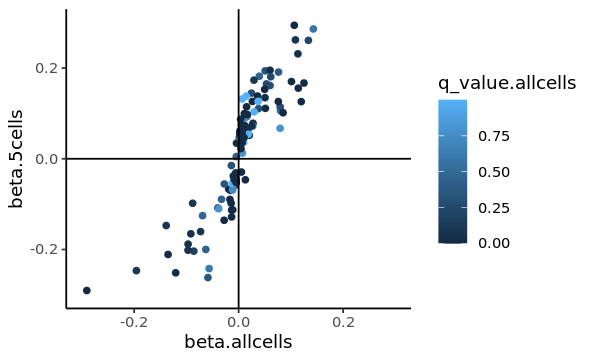

In [26]:
options(repr.plot.width = 5, repr.plot.height = 3)
ggplot(df5, aes(x = beta.allcells, y = beta.5cells, colour = q_value.allcells)) + geom_point() + theme_classic() +
    xlim(c(-0.3,0.3)) + ylim(c(-0.3,0.3)) + geom_hline(yintercept = 0) + geom_vline(xintercept = 0)

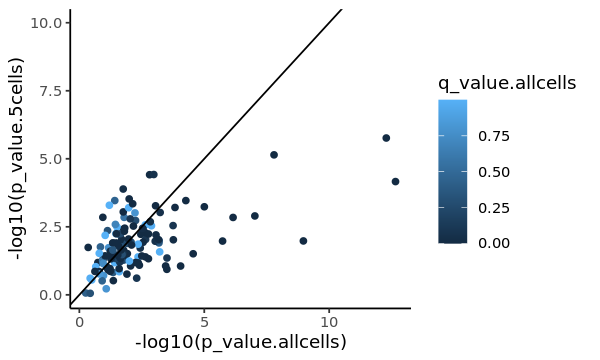

In [28]:
ggplot(df5, aes(x = -log10(p_value.allcells), y = -log10(p_value.5cells), colour = q_value.allcells)) + geom_point() + 
    theme_classic() + geom_abline(slope = 1) + ylim(c(0,10))